In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [27]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data)

In [28]:
df.columns = housing.feature_names

In [29]:
df['target'] = housing.target

In [30]:
df.head()
df.shape

(20640, 9)

In [31]:
X = df.iloc[:, 0:8]
y = df.target

In [32]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [33]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [35]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
y_pred = dt.predict(X_test)

In [37]:
r2_score(y_test, y_pred)

0.6250125752097502

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [39]:
mean_absolute_error(y_test, y_pred)

0.45240083333333336

In [40]:
mean_squared_error(y_test, y_pred)

0.4913868881725775

Hyperparameter Tuning

In [41]:

param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','friedman_mse'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}
     

In [42]:
gs = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

In [43]:
gs.fit(X_train, y_train)

C:\Users\harik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [44]:
gs.best_score_

0.46149607986708385

In [45]:
gs.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 1.0,
 'min_samples_split': 0.25}

In [46]:
mean_absolute_error(y_test, y_pred)

0.45240083333333336

Feature Importance

In [47]:
for importance, name in sorted(zip(dt.feature_importances_, X_train.columns),reverse=True):
    print(name, importance)

MedInc 0.5280391728418626
AveOccup 0.1306413522550062
Latitude 0.0934685168744307
Longitude 0.0831318304510731
AveRooms 0.05336633073631741
HouseAge 0.05275455185123036
Population 0.029850125345768384
AveBedrms 0.02874811964431131


In [48]:
mean_absolute_error(y_test, y_pred)

0.45240083333333336

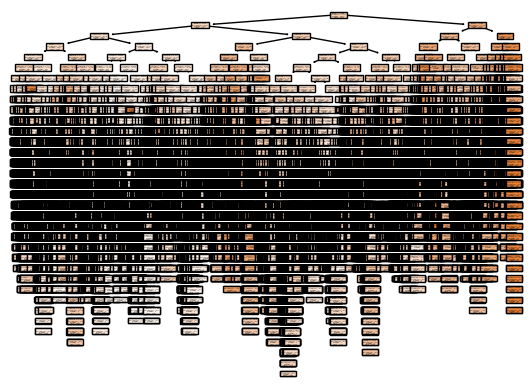

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
for x in df.head(10):
    tree.plot_tree(dt, filled=True, feature_names=housing.feature_names)
    plt.show()